In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import sklearn as skl
from sklearn import neighbors, datasets

# Вспомогательные функции

In [3]:
def test(conditions):
    if all( conditions ):
        print('Test successfully passed!')
    else:
        print('Test failed!')    

In [4]:
def vec(x):
    '''Given sequence x returns numpy array x as vector with shape (len(x),1)'''
    if not isinstance(x,np.ndarray):
        x=np.array(x)
    assert len(x.shape)==1,'x should contain only one axis!'
    return x[:,np.newaxis]

In [5]:
def plot_decision_regions(x1, x2, Y_train, KNN_fun, K , n=30, interpolation = 'gaussian', margin1=None, margin2=None):
    '''Plots decision regions for classifier clf trained on design matrix X=[x1,x2] with classes y.
    n is the number of ticks along each direction'''
    
    X_train = hstack([vec(x1),vec(x2)])
    
    if margin1==None:
        margin1 = 0.05*(x1.max()-x1.min())
    if margin2==None:
        margin2 = 0.05*(x2.max()-x2.min())
        
    # create a mesh to plot in
    x1_min, x1_max = x1.min() - margin1, x1.max() + margin1
    x2_min, x2_max = x2.min() - margin2, x2.max() + margin2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, n),
                         np.linspace(x2_min, x2_max, n))

    X_test = hstack( [vec(xx1.ravel()), vec(xx2.ravel())] )    
    Y_test = KNN_fun(X_train,Y_train,X_test,K)
    yy = Y_test.reshape(len(xx1),len(xx2))

    colors = [[0,0.5,1],[1,0,0],[0,1,0.5],[0.7,0.7,0.7]]

    cmap = mpl.colors.ListedColormap(colors)
    bounds=list(range(len(colors)))+[len(colors)]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    img = plt.imshow(yy, extent=(x1_min, x1_max, x2_min, x2_max), interpolation=interpolation, origin='lower', cmap=cmap, norm=norm, alpha=0.5)
    
    scatter(x1, x2, facecolor=[colors[int(y)] for y in Y_train])
    plt.axis([x1_min, x1_max, x2_min, x2_max])


# Базовая функция KNN

In [6]:
def KNN(X_train,Y_train,X_test,K):
    clf = skl.neighbors.KNeighborsClassifier(n_neighbors=K)
    clf.fit(X_train,Y_train)
    Y_test = clf.predict(X_test)
    return Y_test

# Задание

Вам нужно запрограммировать такую же функцию KNN целиком самим (используя только библиотеку numpy) - с такими же параметрами:
X_train - признаки обучающей выборки размерность: NxD
Y_train - классы обучающей выборки, размерность: D
X_test - признаки контрольной выборки размерность: MxD
K - число ближайших соседей

# Проверка задания

Все ячейки снизу должны отработать для вашей функции также, как и для базовой функции KNN 

In [7]:
X_train = array([[0,0,0,0],[1,1,1,1],[2,2,2,2]])
Y_train = array([10,11,12])
X_test=array([[2.1,2.1,2.1,2.1], [.8,.8,.8,.8]])

test(KNN(X_train,Y_train,X_test,K=1)==array([12,11]))

Test successfully passed!


In [8]:
X_train = array([[0],[3],[2],[12],[10],[9],[22],[19],[21]])
Y_train = array([1,0,0,2,1,1,0,2,2])
X_test=array([[20],[11],[1]])


test( KNN(X_train,Y_train,X_test,K=3)==array([2,1,0]) )

Test successfully passed!


In [9]:
X_train, Y_train = datasets.make_moons(n_samples=100, noise=.5, random_state=0)

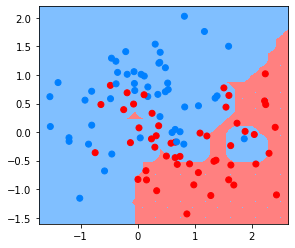

In [10]:
plot_decision_regions(X_train[:,0],X_train[:,1], Y_train, KNN, K=1)

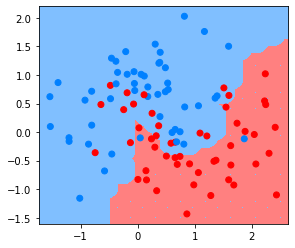

In [11]:
plot_decision_regions(X_train[:,0],X_train[:,1], Y_train, KNN, K=10)

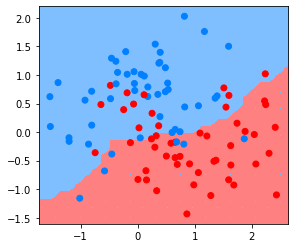

In [12]:
plot_decision_regions(X_train[:,0],X_train[:,1], Y_train, KNN, K=30)